In [4]:
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_curve
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ataikenesbekov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


import pandas as pd:
Pandas используется для работы с табличными данными (DataFrames). Это библиотека для обработки и анализа данных, которая позволяет удобно загружать, обрабатывать и манипулировать данными.


from sklearn.model_selection import train_test_split:
Функция train_test_split из библиотеки scikit-learn используется для разделения данных на обучающую и тестовую выборки. Это нужно для оценки качества модели на данных, которые модель не видела во время обучения.


import nltk:
NLTK (Natural Language Toolkit) — это библиотека для обработки естественного языка (NLP). Она предоставляет множество инструментов для обработки текстов, таких как токенизация, стемминг, работа со стоп-словами и многое другое.


import string:
Модуль string используется для работы с символьными строками и содержит различные полезные константы и функции для обработки текста, такие как удаление пунктуации и символов.


from nltk.corpus import stopwords:
stopwords — это список "стоп-слов", которые являются частыми, но неинформативными для анализа текста (например, "и", "или", "но" и т.д.). Эти слова часто удаляются при обработке текста.


from nltk.tokenize import word_tokenize:
word_tokenize — это функция, которая разбивает текст на отдельные слова (токены). Токенизация — важный этап предварительной обработки текста.


from nltk.stem import SnowballStemmer:
SnowballStemmer — это инструмент для стемминга, который приводит слова к их "основной" форме (например, "running" → "run"). Это важно для уменьшения размерности данных в текстовых задачах.


nltk.download('punkt'):
Эта команда загружает необходимые ресурсы для NLTK, такие как модели токенизации (например, для английского языка). punkt — это набор данных для токенизации текста.


from sklearn.pipeline import Pipeline:
Pipeline позволяет объединить несколько шагов машинного обучения в один конвейер. Например, можно объединить в один процесс предварительную обработку данных (токенизация, векторизация) и обучение модели.


from sklearn.linear_model import LogisticRegression:
LogisticRegression — это алгоритм машинного обучения, который часто используется для задач бинарной классификации. Он предсказывает вероятность того, что объект относится к определенному классу.


from sklearn.feature_extraction.text import TfidfVectorizer:
TfidfVectorizer преобразует текстовые данные в числовое представление, используя метод TF-IDF (Term Frequency - Inverse Document Frequency). Это один из популярных способов векторизации текста для задач NLP.


from sklearn.metrics import precision_score, recall_score, precision_recall_curve:
precision_score и recall_score используются для оценки точности и полноты (precision и recall) классификационных моделей.
precision_recall_curve строит кривую зависимости precision от recall, что помогает оценить поведение модели при разных порогах классификации.


from matplotlib import pyplot as plt:
Matplotlib — это библиотека для визуализации данных. pyplot предоставляет простой интерфейс для создания графиков и диаграмм, таких как графики точности и полноты.


from sklearn.metrics import plot_precision_recall_curve:
Эта функция строит график precision-recall для модели на основе ее предсказаний, что помогает визуально оценить производительность модели на разных порогах.
import numpy as np:
NumPy — это библиотека для работы с многомерными массивами и матрицами, а также для выполнения математических операций над ними. Она часто используется в машинном обучении для быстрого выполнения вычислений.


from sklearn.model_selection import GridSearchCV:
GridSearchCV выполняет перебор гиперпараметров модели (например, параметры регуляризации или количество признаков) для нахождения наилучших значений с использованием кросс-валидации.


In [5]:
df = pd.read_csv('labeled 2.csv', sep=',')  

In [6]:
df.shape


(14412, 2)

In [7]:
df.head(10)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0
5,Для каких стан является эталоном современная с...,1.0
6,В шапке были ссылки на инфу по текущему фильму...,0.0
7,УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РА...,1.0
8,"Ебать тебя разносит, шизик.\n",1.0
9,"Обосрался, сиди обтекай\n",1.0


In [8]:
df['toxic'] = df['toxic'].apply(int)

In [9]:
df.head(5)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1


In [9]:
df['toxic'].value_counts()

0    9586
1    4826
Name: toxic, dtype: int64

In [10]:
for c in df[df['toxic'] == 1]['comment'].head(5): 
    print(c)

Верблюдов-то за что? Дебилы, бл...

Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Собаке - собачья смерть

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?

тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)



In [11]:
for c in df[df['toxic'] == 0]['comment'].head(5): 
    print(c)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

In [12]:
train_df , test_df = train_test_split(df,test_size=500)

In [13]:
test_df.shape

(500, 2)

In [14]:
test_df['toxic'].value_counts()

0    336
1    164
Name: toxic, dtype: int64

In [15]:
train_df['toxic'].value_counts()

0    9250
1    4662
Name: toxic, dtype: int64

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ataikenesbekov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
sentence_example = df.iloc[1]["comment"]
tokens = word_tokenize(sentence_example, language="russian")
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
russian_stop_words = stopwords.words("russian")
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words]
snowball = SnowballStemmer(language="russian")
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]


In [18]:
print(f"Исходный текст: {sentence_example}")
print("-----------------")
print(f"Токены: {tokens}")
print("-----------------")
print(f"Токены без пунктуации: {tokens_without_punctuation}")
print("-----------------")
print(f"Токены без пунктуации и стоп слов: {tokens_without_stop_words_and_punctuation}")
print("-----------------")
print(f"Токены после стемминга: {stemmed_tokens}")
print("-----------------")

Исходный текст: Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

-----------------
Токены: ['Хохлы', ',', 'это', 'отдушина', 'затюканого', 'россиянина', ',', 'мол', ',', 'вон', ',', 'а', 'у', 'хохлов', 'еще', 'хуже', '.', 'Если', 'бы', 'хохлов', 'не', 'было', ',', 'кисель', 'их', 'бы', 'придумал', '.']
-----------------
Токены без пунктуации: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'а', 'у', 'хохлов', 'еще', 'хуже', 'Если', 'бы', 'хохлов', 'не', 'было', 'кисель', 'их', 'бы', 'придумал']
-----------------
Токены без пунктуации и стоп слов: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'хохлов', 'хуже', 'Если', 'хохлов', 'кисель', 'придумал']
-----------------
Токены после стемминга: ['хохл', 'эт', 'отдушин', 'затюкан', 'россиянин', 'мол', 'вон', 'хохл', 'хуж', 'есл', 'хохл', 'кисел', 'придума']
-----------------


In [19]:
snowball = SnowballStemmer(language = 'russian')
russian_stop_words = stopwords.words('russian')


def tokensize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = nltk.word_tokenize(sentence, language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]  # Remove punctuation
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]  # Remove stop words
    tokens = [snowball.stem(i) for i in tokens]  # Stemming
    return tokens
        

In [20]:
tokensize_sentence(sentence_example)

['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

In [21]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokensize_sentence(x, remove_stop_words= True))

In [22]:
features = vectorizer.fit_transform(train_df["comment"])

/Users/ataikenesbekov/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [23]:
model = LogisticRegression(random_state = 0)
model.fit(features, train_df['toxic'])

LogisticRegression(random_state=0)

In [24]:
model.predict(features[0])

array([0])

In [25]:
train_df["comment"].iloc[0]

'Что на что? У жены 1 комн. кв., а у родителей 3хк. Они живут каждый в своей комнате и мать и отец. Им под 70 лет. Как ты представляешь? Их в однешку , а мы в трешку? Нет. Трешку и однешку поменять на 2 двушки? Есть моя родная сестра, которая живёт в Москве 15 лет, но доля в трешке у нее такая же как у всех. Трёшка просторная и высокая, но район не ага. И цены на них невысокие , дом 1953 г.в., но откапитален и в хорошем состоянии в отличии от таких же вокруг. Цена трёшки такая же как цена той однешки, что купила жена. Что то ок 2лм , что то. Две двушки в какой-нибудь жопе с малым квадратом они вот на хер не нужны. Трёшка отличная квартира и менять только себе насрать.\n'

In [26]:
model_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokensize_sentence(x, remove_stop_words= True))),
    ("model" , LogisticRegression(random_state=0))
])

In [27]:
model_pipeline.fit(train_df["comment"], train_df["toxic"])

/Users/ataikenesbekov/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x16abceca0>)),
                ('model', LogisticRegression(random_state=0))])

In [28]:
model_pipeline.predict(["Привет , у меня все нормально"])

array([0])

In [3]:
model_pipeline.predict(["а"])

NameError: name 'model_pipeline' is not defined

In [30]:
model_pipeline.predict(["Привет  "])

array([1])

In [31]:
precision_score(y_true = test_df['toxic'], y_pred = model_pipeline.predict(test_df['comment']))

0.8771929824561403

In [32]:
recall_score(y_true = test_df['toxic'], y_pred = model_pipeline.predict(test_df['comment']))

0.6097560975609756

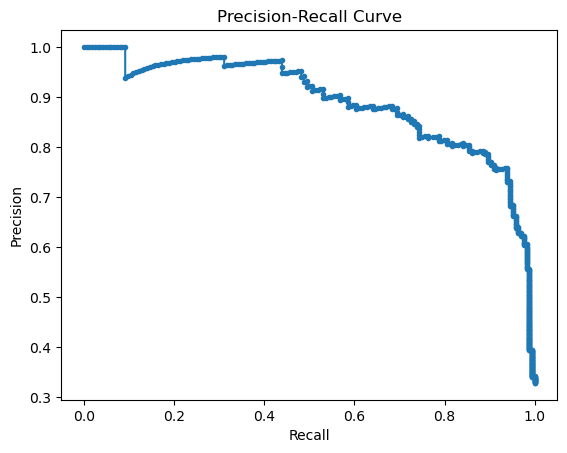

In [56]:
precision, recall, thresholds = precision_recall_curve(y_true=test_df["toxic"], probas_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1])

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



In [57]:
prec, rec, thresholds = precision_recall_curve(y_true=test_df["toxic"], probas_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1])


from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(estimator=model_pipeline, X=test_df["comment"], y=test_df["toxic"])


plot_precision_recall_curve(estimator=model_pipeline, X=test_df["comment"], y=test_df["toxic"])

In [58]:
np.where(prec > 0.95)

(array([415, 416, 417, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432,
        433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445,
        446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458,
        459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471,
        472, 473, 474, 475, 476, 477, 483, 484, 485, 486, 487, 488, 489,
        490, 491, 492, 493, 494, 495, 496, 497, 498]),)

In [59]:
thresholds[374]

0.48326600390712715

In [90]:
precision_score(y_true = test_df['toxic'], y_pred = model_pipeline.predict_proba(test_df['comment'])[:, 1] > thresholds[322])

0.7954545454545454

In [93]:
recall_score(y_true = test_df['toxic'], y_pred = model_pipeline.predict_proba(test_df['comment'])[:, 1] > thresholds[322])

0.8536585365853658

In [69]:
grid_pipeline = Pipeline([
    ('vectorizer',  TfidfVectorizer(tokenizer=lambda x: tokensize_sentence(x, remove_stop_words=True))),
    ("model",
    GridSearchCV(
        LogisticRegression(random_state=0),
        param_grid = {'C':[0.1 , 1, 10.]},
        cv=3,
            verbose = 4
        )
    )
])

In [72]:
grid_pipeline.fit(train_df['comment'], train_df['toxic'])

/Users/ataikenesbekov/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.688 total time=   0.2s
[CV 2/3] END .............................C=0.1;, score=0.686 total time=   0.2s
[CV 3/3] END .............................C=0.1;, score=0.687 total time=   0.2s
[CV 1/3] END ...............................C=1;, score=0.840 total time=   0.5s
[CV 2/3] END ...............................C=1;, score=0.833 total time=   0.4s
[CV 3/3] END ...............................C=1;, score=0.841 total time=   0.4s


/Users/ataikenesbekov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ............................C=10.0;, score=0.867 total time=   0.5s


/Users/ataikenesbekov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ............................C=10.0;, score=0.860 total time=   0.6s
[CV 3/3] END ............................C=10.0;, score=0.875 total time=   0.5s


/Users/ataikenesbekov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x1682e7b00>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.1, 1, 10.0]}, verbose=4))])

In [74]:
model_pipeline_c_10 = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokensize_sentence(x, remove_stop_words= True))),
    ("model" , LogisticRegression(random_state=0, C=10.))
])

In [77]:
model_pipeline_c_10.fit(train_df['comment'], train_df['toxic'])

/Users/ataikenesbekov/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/ataikenesbekov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x17524bc40>)),
                ('model', LogisticRegression(C=10.0, random_state=0))])

In [78]:
prec_c_10, rec_c_10, thresholds_c_10 = precision_recall_curve(y_true = test_df['toxic'], probas_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1])

In [79]:
np.where(prec_c_10 > 0.95)

(array([422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434,
        435, 436, 437, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451,
        452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464,
        465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477,
        478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490,
        491, 492, 493, 494, 495, 496, 497, 498]),)

In [89]:
precision_score(y_true = test_df['toxic'], y_pred = model_pipeline_c_10.predict_proba(test_df['comment'])[:, 1] > thresholds_c_10[322])

0.8068181818181818

In [92]:

recall_score(y_true=test_df["toxic"], y_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1] > thresholds_c_10[316])


0.8841463414634146

NameError: name 'model_pipeline' is not defined